# Лабораторна робота 2

## Виконано студенкою групи АнД-41
## Бовсуновською Марією


## Завдання
1. Поглиблено вивчити функцію make_regression.
2. Згенерувати набір даних за допомогою означеної функції, з використанням якнайбільшої кількості параметрів.
3. Розмірність набору даних прийняти у вигляді (100 000х(30-n)), де n - номер за списком.
4. Здійснити моделювання згенерованого набору даних та візуалізацію результатів.
5. Результати оформити у вигляді файлів:

- набір даних у форматі .csv
- код для формування набору даних у форматі .ipynb
- код для моделювання та візуалізації у форматі .ipynb

6. Результати викласти у репозиторії GitHub (папка Lab2).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

In [5]:
import numpy as np
import random as rd
np.random.seed(0)
rd.seed(0)

# from sklearn.model_selection import train_test_split
from sklearn import linear_model, datasets

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pandas as pd


In [6]:
variant=3
n_sample=100000*(30-variant)
bias=0
seed=0

x, y, coef = datasets.make_regression(
    n_samples=n_sample,
    n_features=1,
    n_informative=1,
    # n_targets=1,
    bias=bias,
    # effective_rank=None,
    # tail_strength=0.5,
    noise=10,
    # shuffle=True,
    coef=True,
    random_state=seed,
)

# Parameters sklearn.datasets.make_regression
# n_samples int, default=100
# The number of samples.

# n_features int, default=100
# The number of features.

# n_informative int, default=10
# The number of informative features, i.e., the number of features used to build the linear model used to generate the output.

# n_targets int, default=1
# The number of regression targets, i.e., the dimension of the y output vector associated with a sample. By default, the output is a scalar.

# bias float, default=0.0
# зміщення в базовій лінійній моделі.

# effective_rank int, default=None
# if not None:
# The approximate number of singular vectors required to explain most of the input data by linear combinations. 
# Using this kind of singular spectrum in the input allows the generator to reproduce the correlations often observed in practice.
# if None:
# Вхідний набір добре обумовлений, центрований і гауссовий з одиницею дисперсії.

# tail_strength float, default=0.5
# Відносна важливість товстого шумового хвоста профілю сингулярних значень. When a float, it should be between 0 and 1.
# The relative importance of the fat noisy tail of the singular values profile if effective_rank !!!!!is not None. When a float, it should be between 0 and 1.

# noise float, default=0.0
# The standard deviation of the gaussian noise applied to the output.

# shuffle bool, default=True
# Shuffle the samples and the features.

# coef bool, default=False
# If True, the coefficients of the underlying linear model are returned.

# random_state int, RandomState instance or None, default=None
# Визначає генерацію випадкових чисел для створення набору даних. Pass an int for reproducible output across multiple function calls.





In [16]:

# test
# print(x)
# print(y)
# print(x.size)
# print(y.size)

# model
linreg=linear_model.LinearRegression()
linreg.fit(x, y)
print("Коефіцієнти лінійної моделі:")
print("базові ","лінрег")
print(coef, " ", linreg.coef_)
basic_y=[[i*coef]for i in np.arange(-5,6,1) ]
linreg_y=[[i*linreg.coef_[0]]for i in np.arange(-5,6,1) ]
# print(basic_y)
# print(linreg_y)

#in file
titles=np.array(("X","Y"))
data=np.hstack((x, y[:,np.newaxis]))
df=pd.DataFrame(data=data,columns=titles)
df.to_csv('lr2_data.csv', index=False, sep=';')

Коефіцієнти лінійної моделі:
базові  лінрег
48.15168266323545   [48.14673643]


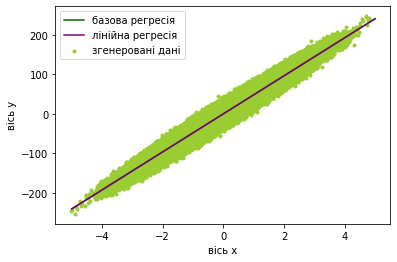

In [15]:


plt.scatter(x, y, color="yellowgreen", marker=".", label="згенеровані дані")
plt.plot(np.arange(-5,6,1), basic_y, color='darkgreen', linestyle='-', label='базова регресія')
plt.plot(np.arange(-5,6,1), linreg_y, color='purple', linestyle='-', label='лінійна регресія')
plt.xlabel('вісь x')
plt.ylabel('вісь y')
plt.legend()
plt.plot()
plt.show()